# Titanic Dataset

## Objective

To predict whether or not a passanger on the Titanic survived the crash. Submit the predictions to Kaggle.

## About Titanic

Titanic was a British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 people. The Titanic was 882 feet 9 inches (269.1 metres) long, at the time the World’s largest man-made moving object. There were 840 staterooms in all, 416 in First Class, 162 in Second Class, and 262 in Third Class. There were 10 decks in total. From top to bottom they were the Boat Deck, the Promenade Deck (deck A), passenger decks B to G, Orlop Deck, and the Tank Top.

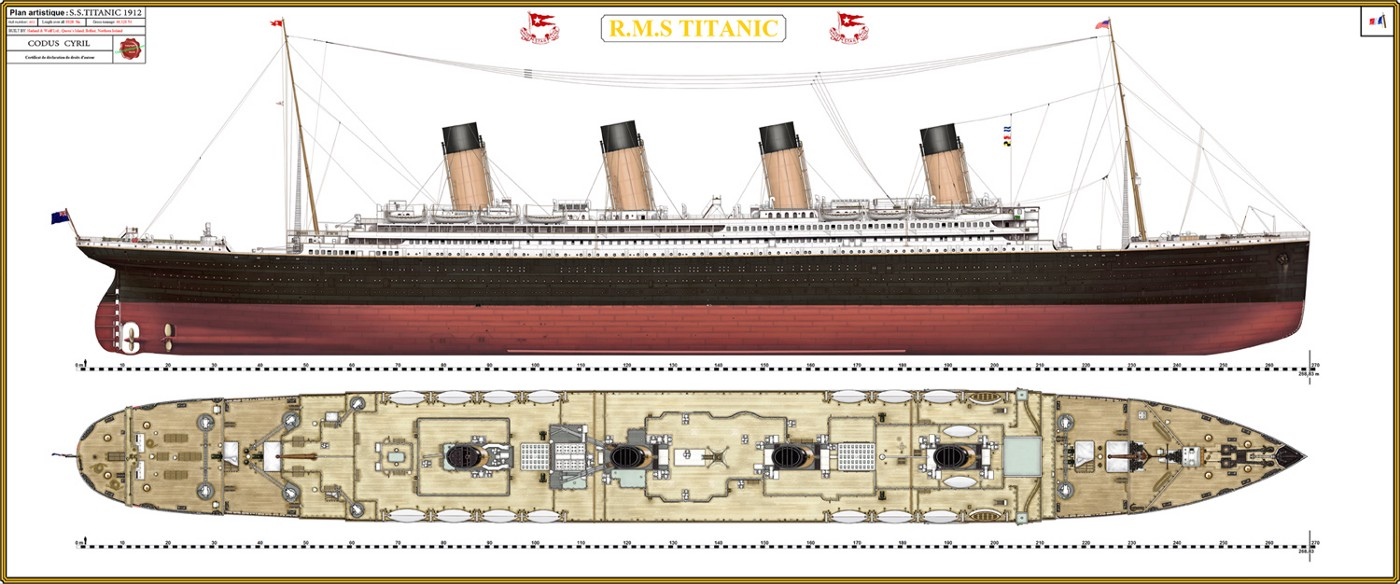

## Dataset Information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First we need to load the data into pandas dataframe to see what type of information/data we have.

In [2]:
# Read the datasets into pandas dataframe
train = pd.read_csv('train.csv', header=0)
test = pd.read_csv('test.csv', header=0)

Let's find out the size of the data we have to work with, and the size of our test dataset. This is important because the test dataset will also need to be transformed into the format of our training dataset. Let's find out the respective sizes of our datasets.

In [3]:
# Print information about the training dataset
print("Number of Examples: {}\nNumber of Features: {}".format(train.shape[0], train.shape[1]))

Number of Examples: 891
Number of Features: 12


We notice that we are working with 891 rows, and 12 features in our training dataset. We have a relatively large data for training.

In [4]:
# Print information about the test dataset
print("Number of Examples: {}\nNumber of Features: {}".format(test.shape[0], test.shape[1]))

Number of Examples: 418
Number of Features: 11


We also notice that we are working with 418 rows, and 11 features for our test dataset. This makes sense because the test file does not have surived feature, which is our class variable. In toatl we have 1309 total instances, and the test dataset makes up about 31% of the overall dataset.

In [5]:
# Check what the training dataset looks like
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check what the training dataset looks like
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


From the get-go it appears that we have some missing values labeled as NaN in Cabin feature in our training dataset. There may be other features that also have missing values, and we have to find out how many values are missing as well as their type. Furthermore, note that there is no Survived feature in our test dataset. We first take a look at the data type, and the find the total number of missing values in our datasets.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we notice that most of the feature values are either int64 or float64 type, while the remaining are object datatype. Cabin feature is an object type as we should have expected because just by looking at the first few values of the feature, we notice that it is a combination of letters and numbers. It is expected that the datatype of the test dataset will also match training dataset. Let's find out how many values are missing.

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have 177 missing instances of Age, 687 missing instances of Cabin in our training dataset, and 2 values for Embarked. Cabin feature maybe important in determining survival because if the Cabin is located at the top, it might be easier for people to make it to the boat deck. However, if the cabin is located somewhere deep inside the ship, a passanger must make their way through all the people who are also headed to the boat deck. It is shorter distance for those near the top of the ship. We do not have a way of imputing these values since this information is nominal, and it does not make sense to have average Cabin, or median Cabin. For now we leave this feature alone, but we may have to drop it at some point. Lastly, for our test dataset we notice that thare are 86 missing values for Age, 1 value for Fare, and 327 values for Cabin. 

## Feature Information

In this section we analyze each feature individually to see what information we can gain.

### PassengerId

We expect that each person will have his or her own unique PassengerId. What we want to find out here is, does PassengerId have any bearing on whether a person survived or not? We may have to look into other features. For instance, we may have to consider the survival rate of those travelling first class, the fare they paid, and PassengerIds for these people. There is a lot of information to consider here to extract some information.

In [10]:
print("Number of Unique PassengerIds: {}".format(len(train.PassengerId.unique())))

Number of Unique PassengerIds: 891


We notice that we have 891 unique PassengerIds - same as the number of instances in our training dataset. Our expectation that each Passenger had his/her own Id was correct. Next, we need to check PassengerId and survival.

In [11]:
train.loc[(train.Survived == 1)]['PassengerId'].unique()

array([  2,   3,   4,   9,  10,  11,  12,  16,  18,  20,  22,  23,  24,
        26,  29,  32,  33,  37,  40,  44,  45,  48,  53,  54,  56,  57,
        59,  62,  66,  67,  69,  75,  79,  80,  82,  83,  85,  86,  89,
        98,  99, 107, 108, 110, 124, 126, 128, 129, 134, 137, 142, 143,
       147, 152, 157, 162, 166, 167, 173, 184, 185, 187, 188, 191, 193,
       194, 195, 196, 199, 205, 208, 209, 210, 212, 216, 217, 219, 221,
       225, 227, 231, 234, 238, 242, 248, 249, 256, 257, 258, 259, 260,
       262, 268, 269, 270, 272, 273, 275, 276, 280, 284, 287, 289, 290,
       291, 292, 299, 300, 301, 302, 304, 306, 307, 308, 310, 311, 312,
       316, 317, 319, 320, 323, 324, 326, 328, 329, 330, 331, 335, 338,
       339, 341, 342, 346, 347, 348, 349, 357, 359, 360, 367, 368, 369,
       370, 371, 376, 377, 381, 382, 384, 388, 390, 391, 392, 394, 395,
       400, 401, 408, 413, 415, 417, 418, 427, 428, 430, 431, 432, 433,
       436, 438, 441, 444, 445, 446, 447, 448, 449, 450, 454, 45

Above we notice PassengerIds of people who survived. We notice that there does not appear to be any order or pattern here. It may be the case that PassengerId has no bearing on survival of a passenger. It may be worthwhile to check the correlation between PassengerId and Survived.

In [12]:
print("Correlation between PassengerId and Survived: {}".format(train.corr()['PassengerId'][1]))

Correlation between PassengerId and Survived: -0.005006660767066476


We notice that there is no correlation between PassengerId and Survived. Since we cannot extract information that we already do not have, we will drop this feature in our preprocessing stage.

### Survived

This is our class, and what we are trying to predict. We expect that this is binary classification problem {1: Survived, 0: Perished}. Let's find out some information about this feature.

In [13]:
train.Survived.unique()

array([0, 1])

We should find out how many survived, and how many perished.

In [14]:
survived = train.loc[train.Survived == 1].count()[1]
perished = train.loc[train.Survived == 0].count()[1]
print("Number of People Survived: {}\nNumber of People Perished: {}".format(survived, perished))

Number of People Survived: 342
Number of People Perished: 549


We notice here that the only a few people in our training dataset survived the crash. Let's plot this information.

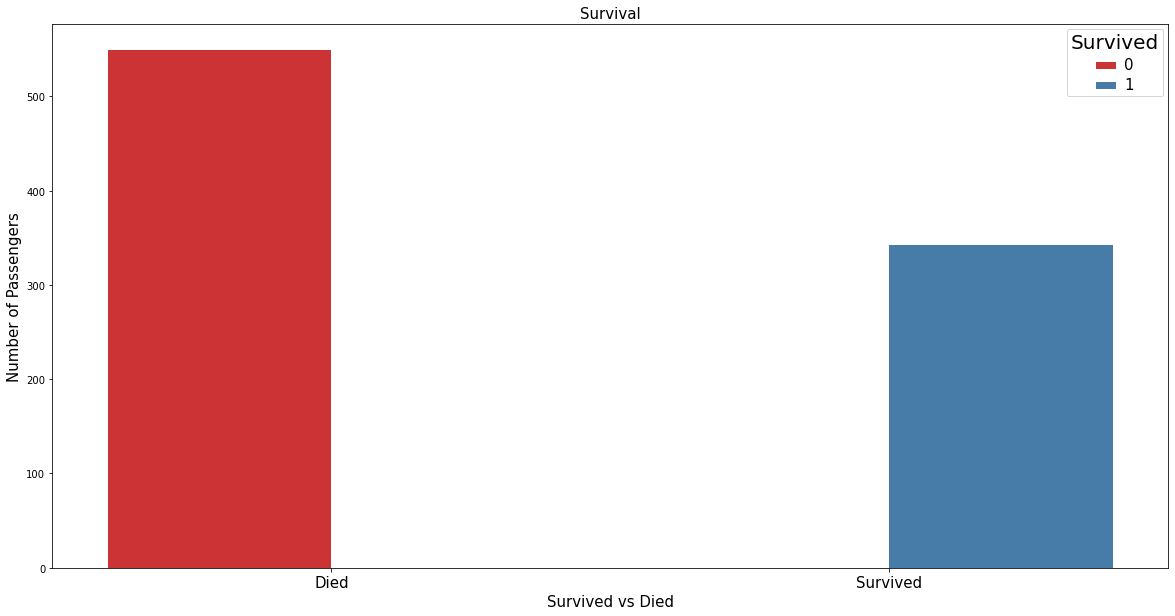

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(x = 'Survived', hue="Survived", data=train, palette="Set1")
plt.title('Survival', fontsize=15)
plt.xlabel('Survived vs Died', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.xticks([1, 0], ['Survived', 'Died'], fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.show()

We notice that approximately 38% of the passengers survived and the rest, approximately 61%, perished. The plot above helps us visualize this information. We will return to this feature again when we compare it with others.

### Pclass

Pclass is the passenger class. Passenger class 1 refers to firstclass passengers and 2 refers to secondclass and 3 to thirdclass. We are intersted in finding out how many passengers survived from each class. 

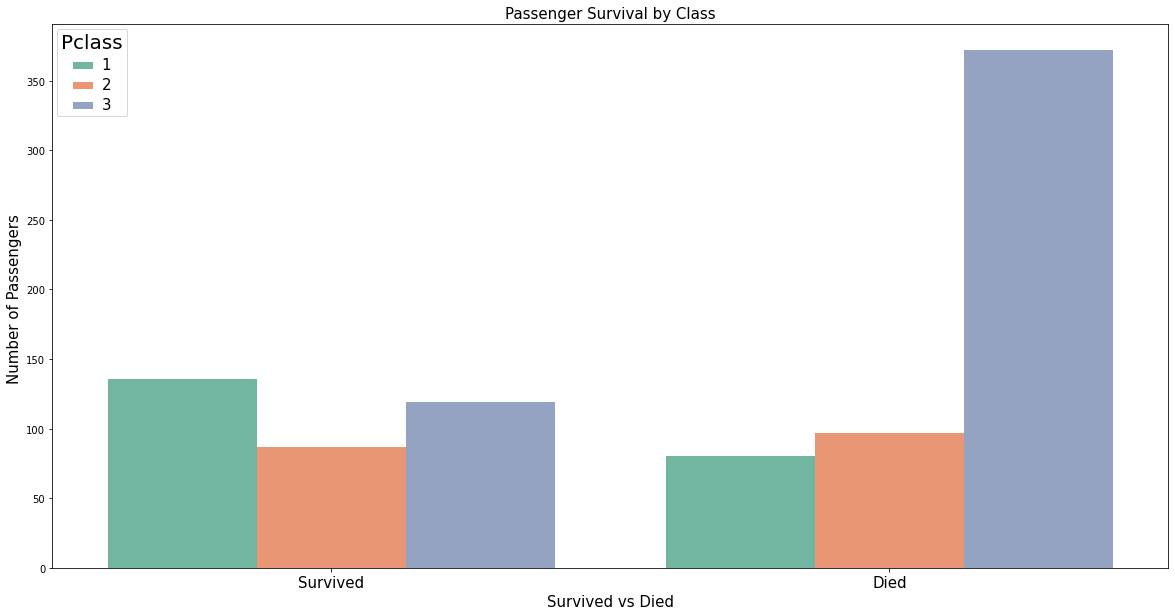

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
g = sns.countplot(x='Survived', hue="Pclass", data=train, order=[1,0], palette="Set2")
plt.title('Passenger Survival by Class', fontsize=15)
plt.xlabel('Survived vs Died', fontsize=15)
plt.ylabel('Number of Passengers ', fontsize=15)
plt.xticks([0, 1], ['Survived', 'Died'], fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.show()

We notice here that only a few passengers surived, and most of those who survived travelled firstclass. Vast majority of people who travelled lower class unfortunately perished. Let's find out the percentages and numbers of people who travelled each of the class.

In [17]:
print("Number of Firstclass Passengers: {}".format(train.loc[train.Pclass == 1].count()[2]))
print("Number of Secondclass Passengers: {}".format(train.loc[train.Pclass == 2].count()[2]))
print("Number of Thirdclass Passengers: {}".format(train.loc[train.Pclass == 3].count()[2]))

Number of Firstclass Passengers: 216
Number of Secondclass Passengers: 184
Number of Thirdclass Passengers: 491


We notice that vast majority of people were thirdclass passengers. It makes sense that they suffered greater number of loss since their numbers were also greater. However, this begs a comparison between the classes, and thier loss rate.

In [18]:
print("Number of Firstclass Passengers: {}".format(train.loc[(train.Pclass == 1) & (train.Survived == 1)].count()[2]))
print("Number of Secondclass Passengers: {}".format(train.loc[(train.Pclass == 2) & (train.Survived == 1)].count()[2]))
print("Number of Thirdclass Passengers: {}".format(train.loc[(train.Pclass == 3) & (train.Survived == 1)].count()[2]))

Number of Firstclass Passengers: 136
Number of Secondclass Passengers: 87
Number of Thirdclass Passengers: 119


We see here that as a percentage, approximately 63% of the firstclass passengers survived the crash. Only 47% of the secondclass passengers survived the crash. Lastly, only 24% of the passengers travelling thirdclass survived the crash. If you were to travel thirdclas on this ship, your chances of survival are poor since nearly 76% of the people of this class perished.

### Name

We expect that there will be 891 unique names, however the titles will be common amongst people. We can extract this information from the names and create a nominal feature for the titles of people. We know there are no missing values for this feature, and therefore we will revisit this variable in our preprocessing stage to extract the titles.

### Sex

We expect this to have some bearing on survival. Generally, during the times of disaster, women and children are extracted first. We expect to see the same here. But before we do that, lets find out the division of sex on the ship.

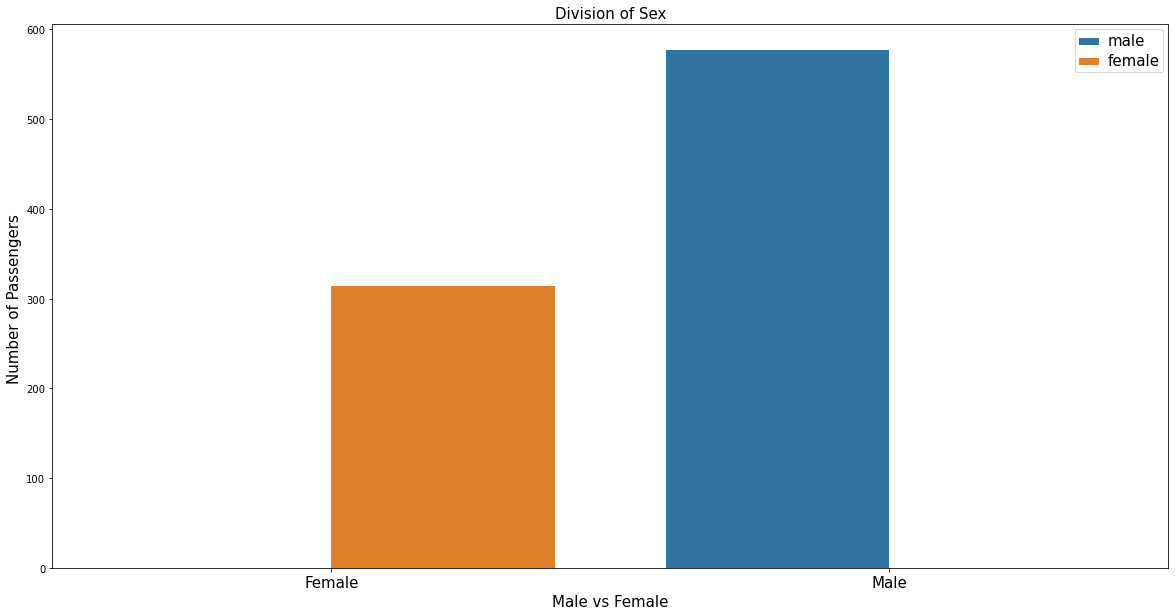

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
g = sns.countplot(x='Sex', hue="Sex", data=train, order=['female', 'male'], palette="tab10")
plt.title('Division of Sex', fontsize=15)
plt.xlabel('Male vs Female', fontsize=15)
plt.ylabel('Number of Passengers ', fontsize=15)
plt.xticks([0, 1], ['Female', 'Male'], fontsize=15)
plt.legend(loc='upper right')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.show()

In [20]:
print("Number of Women: {}".format(train.loc[(train.Sex == 'female')].count()[4]))
print("Number of Men: {}".format(train.loc[(train.Sex == 'male')].count()[4]))

Number of Women: 314
Number of Men: 577


We notice in the graph above that we have greater number of men on the ship than women. To be exact, 64% of the people on the ship were men, and 36% were women. Let's find out passenger survival by sex.

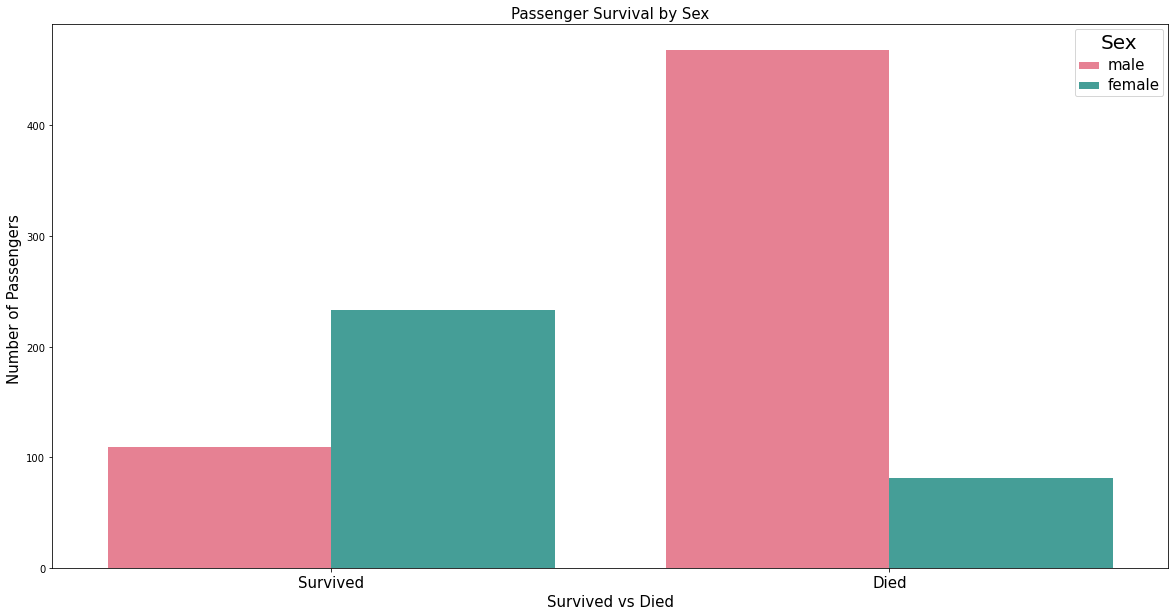

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
g = sns.countplot(x='Survived', hue="Sex", data=train, order=[1,0], palette="husl")
plt.title('Passenger Survival by Sex', fontsize=15)
plt.xlabel('Survived vs Died', fontsize=15)
plt.ylabel('Number of Passengers ', fontsize=15)
plt.xticks([0, 1], ['Survived', 'Died'], fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.show()

In [22]:
print("Number of Women Survived: {}".format(train.loc[(train.Sex == 'female') & (train.Survived == 1)].count()[2]))
print("Number of Men Survived: {}".format(train.loc[(train.Sex == 'male') & (train.Survived == 1)].count()[2]))

Number of Women Survived: 233
Number of Men Survived: 109


In [23]:
print("Number of Women Perished: {}".format(train.loc[(train.Sex == 'female') & (train.Survived == 0)].count()[2]))
print("Number of Women Perished: {}".format(train.loc[(train.Sex == 'male') & (train.Survived == 0)].count()[2]))

Number of Women Perished: 81
Number of Women Perished: 468


We notice that vast majority of men perished. Nearly 81% of the men on the ship did not survive the crash, while only 25% of the women did not survive the crash. Let's find out distribution of sex by class.

In [49]:
(train.loc[(train.Pclass == 1) & (train.Survived == 0)]['Sex'].describe())

count       80
unique       2
top       male
freq        77
Name: Sex, dtype: object

In [52]:
(train.loc[(train.Pclass == 2) & (train.Survived == 0)]['Sex'].describe())

count       97
unique       2
top       male
freq        91
Name: Sex, dtype: object

In [53]:
(train.loc[(train.Pclass == 3) & (train.Survived == 0)]['Sex'].describe())

count      372
unique       2
top       male
freq       300
Name: Sex, dtype: object

### Age

In [25]:
test.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

We notice that max age in our test dataset is 76, while average age is 30. Overall our test data has population that is a bit older than our training dataset.

In [26]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Age feature has a max age of 80, mean age of 29.69, and min age as 0.42. Minimum age is rather odd, what does it mean when someone says their age is 0.42. These are most likely children of people, and 0.42 most likely means that the child is 42% there to being a year old, which would mean that they are 5.04 months old. Let's see what is going on here.

In [27]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

It appears that there are some values in age that are not numbers, we have to deal with these values before we proceed any further.

In [28]:
train.Age = train.Age.fillna(max(train.Age.mode()))
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 24.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Now we have taken care of missing values in this feature. We replaced the missing age values with mode because mode is the most repeated number, and therefore it will have higher relative frequency and therefore by the limiting process of probability it will have higher probability of occurrence. We repeat the same steps for our test dataset.

In [29]:
test.Age.unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [30]:
test.Age = test.Age.fillna(max(test.Age.mode()))
test.Age.unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  , 24.  , 46.  , 23.  , 63.  , 35.  , 45.  , 55.  ,  9.  ,
       48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  , 60.  ,
       36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  , 29.  ,
       28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  , 16.  ,
        1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,  7.  ,
       15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33, 38.  ,
       57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,  0.17,
       59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

Next let's find out some other information like the following:

In [31]:
train.loc[train.Age < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


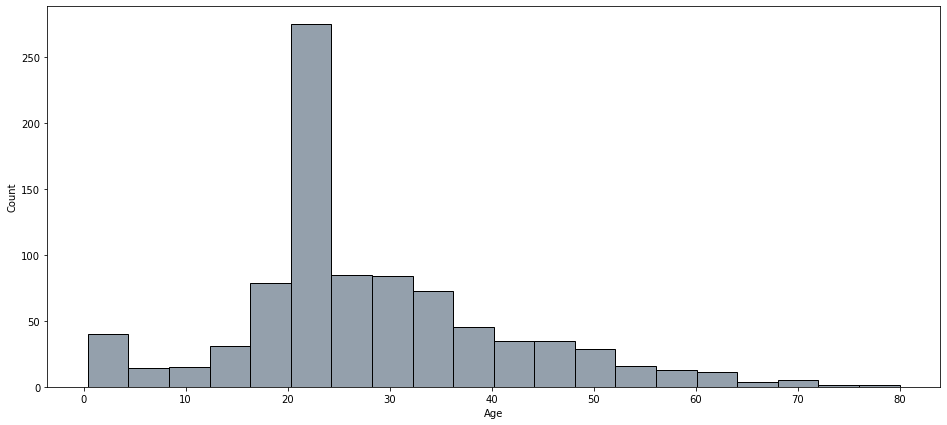

In [32]:
fig, ax = plt.subplots(figsize=(16, 7))
age_histogram = sns.histplot(train.Age, color="slategrey", bins=20)

We notice that vast majority of our passengers are between the age of 20-30. Let's find out the mean and the mode, and decide which of the two shall we use to impute age.

In [33]:
print("Avg. Age: {}\nMode Age: {}".format(round(train.Age.mean(), 2), max(train.Age.mode())))

Avg. Age: 28.57
Mode Age: 24.0


Here we notice that the maximum mode is 24, which means that the most repeated age is 24. We will impute mode as the age for missing age values since it is the most frequent value.

In [34]:
print("Avg. Age: {}\nMode Age: {}".format(round(test.Age.mean(), 2), max(test.Age.mode())))

Avg. Age: 28.98
Mode Age: 24.0


We notice that average age is higher in our test data than in our training data. Thankfully the median age is same, so we can simply impute 24 for missing values, but we have already taken care of this step above. One last step we will take here is that we will convert age into categories.

In [35]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

### Cabin

Now that we have imputed values for age, we still have to figure what to do with Cabin feature. Because there are 687 missing values, we can simply drop these values since we cannot, in any meaningful way, impute the cabin numbers or we can try to figure out some information. Titanic had 10 decks. We expect that people who paid higher fare were located on the top deck, and those that paid lower fare were at the bottom. 

"The entirety of A-Deck was devoted to first-class recreational space and accommodation, along with most of B and C Decks. First-class facilities were located on every level down to F-Deck, which means that first-class passengers enjoyed the most space by far of any of the three classes on the ship."

In [36]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}

data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("G0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

NameError: name 're' is not defined

Also, note that we are trying to predict survived or not. Our label is the second column, we will move this to very end for easy processing, and maintaining order.

Next, we analyze the remaining variables and understand their importance in our dataset. If some of these features turn out to be unimportant to our analysis, we will simply drop these features.

In [ ]:
train.head()

### PassengerId

Let's find out some information about PassengerId. Firstly, note that this feature seems to be nominal. We could have labeled PassengerId as A1, A2, so on and so forth, and it would not have made any difference. Let's see if there is any relationship between PassengerId and survival.

In [ ]:
train['PassengerId'].corr(train['Survived'])

There is no or negative correlation between PassengerId, and our class label. We can drop this information because of its standing in the database. But we will need it later so leave it in the dataset.

### Pclass

Let's find out how many classes are there.

In [ ]:
train.Pclass.unique()

There are three classes. Did the people of class 3 pay more or less money than class 1?

In [ ]:
train.loc[train.Pclass == 3].mean()[3]

Mean fare for Pclass 3 is 13.67

In [ ]:
train.loc[train.Pclass == 2].mean()[3]

Mean fare for Pclass 2 is 20.66, so the fare's are going up as the class increases. We expect Pclas 1 to be the highest fare.

In [ ]:
train.loc[train.Pclass == 1].mean()[3]

Pclass 1 paid the highest fare. Nearly 4 times that of class 2, and 8 times that of class 1. We are definitely keeping this variable as it may have some bearing on surival.

In [ ]:
print("Number of class 1 passengers to survive the Titanic crash: {}".format(train.loc[(train.Pclass == 1) & (train.Survived == 1)].count()[7]))

In [ ]:
print("Number of class 2 passengers to survive the Titanic crash: {}".format(train.loc[(train.Pclass == 2) & (train.Survived == 1)].count()[7]))

In [ ]:
print("Number of class 3 passengers to survive the Titanic crash: {}".format(train.loc[(train.Pclass == 3) & (train.Survived == 1)].count()[7]))

Vast majority of people to surive were class 1 passengers. What is interesting to note is that more class 3 passengers survived than class 2.

### Name

We expect name to have no bearing on a persons' survival rate, unless of course a person is really famous or a high ranking official. We can create a nominal feature from this. In order to ensure that name gets fair treatment, we will extract the titles and drop the name of the persons, after this we will simply drop the Name feature from consideration. 

In [ ]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)

train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [ ]:
train.head()

### Sex

For this variable, we will first find out how many men survived vs women to satisfy our curiosity about this.

In [ ]:
print("Number of females to survive the Titanic crash: {}".format(train.loc[(train.Sex == 'female') & (train.Survived == 1)].count()[1]))

Out of 891 one people only 233 women survived - only 26.15%! Let's find out how many men survived.

In [ ]:
print("Number of males to survive the Titanic crash: {}".format(train.loc[(train.Sex == 'male') & (train.Survived == 1)].count()[1]))

Only 12.23% of men survived the crash. If you were a women on the ship, your chances of survival were higher than your male counterpart. Next we should convert male and female to 1 and 0 for easy processing.

In [ ]:
sex = {'male': 1, 'female': 0}
train.Sex = train['Sex'].map(sex)
test.Sex = test['Sex'].map(sex)

We will skip the discussion of age here since we have already discussed it above.

### SibSp and Parch

SibSp feature mentions the number of siblings and spouses onboard. Parch mentions the number of parents and children onboard, if a child is travelling with a nanny then its 0. We will change Parch to binary values. 1 travelled with family, 0 travelled alone. Let's check what unique values we have here.

In [ ]:
train.Parch.unique()

In [ ]:
data = [train, test]
for dataset in data:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Family'] > 0, 'Companion'] = 0
    dataset.loc[dataset['Family'] == 0, 'Companion'] = 1
    dataset['Companion'] = dataset['Companion'].astype(int)

train['Companion'].value_counts()

In [ ]:
train.Parch = np.where(train.Parch > 0, 1, train.Parch)
test.Parch = np.where(test.Parch > 0, 1, test.Parch)
train.head()

In [ ]:
train.Parch.unique()

Now let's check SibSp

In [ ]:
train.SibSp.unique()

Similar to Parch, let's also change this to binary.

In [ ]:
train.SibSp = np.where(train.SibSp > 0, 1, train.SibSp)
test.SibSp = np.where(test.SibSp > 0, 1, test.SibSp)
train.head()

Note there are other ways other than binarzing these variables. For instance, we can increase the number of features, each reflecting separate information. 

### Ticket

Ticket is nominal information, and the ticket number should have no bearing on surival rate. This should be same as PassengerId. Therefore, we will drop this variable too.

In [ ]:
train = train.drop(columns = 'Ticket')
test = test.drop(columns = 'Ticket')
train.head()

### Embarked

Let's find out how many unique values are here. We will see one NaN value here because there are 2 missing values. Let's impute these.

In [ ]:
train.Embarked.describe()

We notice that most of the people on the ship embarked from Southampton. Therefore, we will impute this value for the two NaN.

In [ ]:
train.loc[(train.Embarked != 'S') & (train.Embarked != 'C') & (train.Embarked != 'Q')]

In [ ]:
train['Embarked'].fillna('S', inplace=True)

We will also change the values for this feature.

In [ ]:
embarked = {'S': 1, 'C': 2, 'Q': 3}
train['Embarked'] = train['Embarked'].map(embarked)
test['Embarked'] = test['Embarked'].map(embarked)
train['Embarked'].unique()

In [ ]:
train.Age = train.Age.replace('Ticket', 24)
train.Age.unique()

In [ ]:
test.Fare.unique()

Initially we also noticed that there is 1 missing value for fare, we impute this now.

In [ ]:
test.Fare = test.Fare.fillna(test.Fare.mean())

We are now ready to embark on classifying the data. Let's see what are test data looks like to see that we did not miss anything.

In [ ]:
test.head()

In [ ]:
train = train[[c for c in train if c not in ['Survived']] + ['Survived']]
train.head()

Again, we see PassengerId here but it is will be dropped before passing our data to the classifiers.

## (b.) Submit your predictions to Kaggle for the test dataset and report your accuracy in your submission. (You will need an account at Kaggle – use a dummy email address to protect your school email address, etc.) For your reference, I achieved 79% using my preprocessing pipeline and a Random Forest classifier. This is not the best, as in Kaggle there are better results. Kaggle also has some results with 100% accuracy which cannot be taken as honest submissions in my opinion.

Note: I will be testing the data on multiple classifiers, and use the best one. I am doing this because the test data provided does not have our class labels. Note the fact that in total including test data and train data we have 1309 instances. Test data makes up about 31% of the overall data. I will be using this as my benchmark with train test split. 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
y = train.Survived
X = train.drop(columns = ['PassengerId', 'Survived'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=0)

### Naive Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

### Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

### KNeighbors Classifier

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

### Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators=200, criterion='entropy')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

We notice that our performance is best with RandomForestClassifier. Therefore, we will proceed with this classifier, and post results on Kaggle.

In [ ]:
y = train.Survived
X = train.drop(columns = 'Survived')
clf = RandomForestClassifier()
clf.fit(X, y)
predictions = clf.predict(test)

#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

#Visualize the first 5 rows
submission.head()

In [ ]:
filename = 'predictions_paras.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

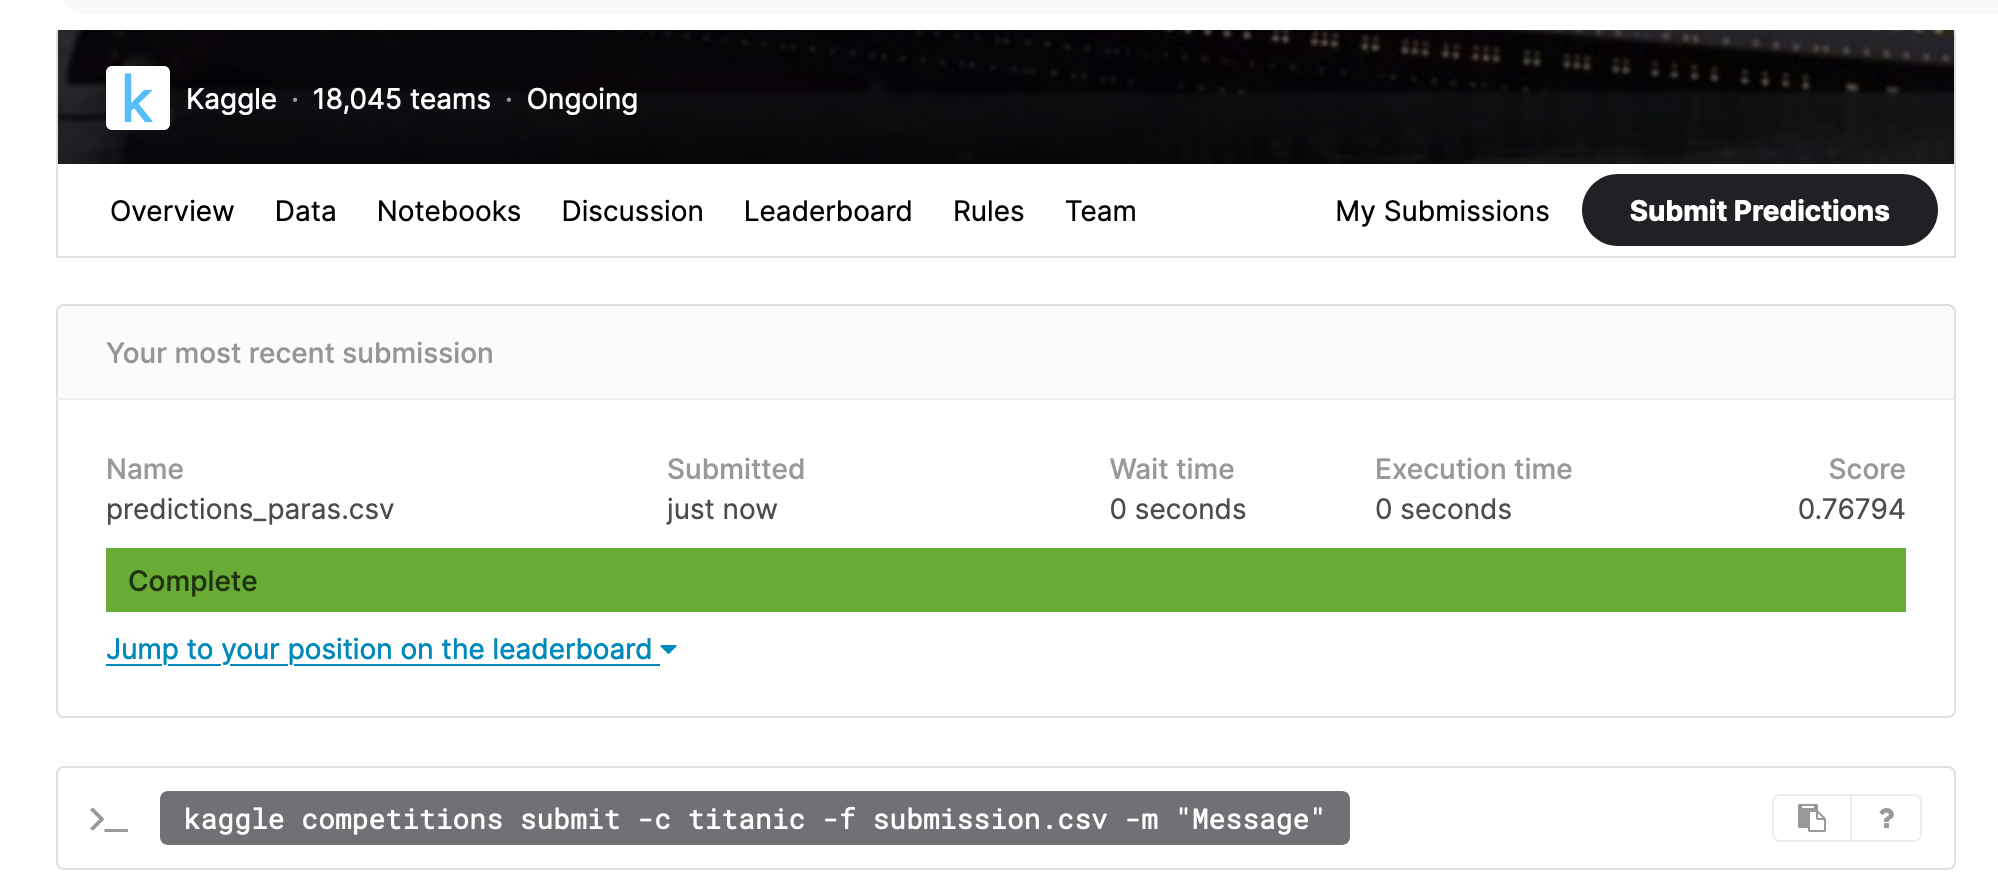

### Thoughts

This is better than my previous submissions. I do believe that I can certainly improve upon this. For instance more hyperparameters could be adjusted. I could have extracted more features, and added them. For instance, I could have extracted more information about the decks. Also, hot-encoding provided no better results than no-hot-encoding. There are more opportunities with this model.